In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
characters = pd.read_csv("data/character-predictions_pose.csv")

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [3]:
# check for nan values
characters.isnull().sum()

S.No                    0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

### Data quality check

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

**Distribution of Continuous Variables** | Annie

In [4]:
corr = pd.DataFrame(characters.corrwith(characters['isAlive'])).sort_values(by=[0], ascending = False)
corr.rename(columns = {0:'corr'})

,corr
isAlive,1.000000
isAliveHeir,0.384900
book4,0.268975
isAliveFather,0.195992
isAliveSpouse,0.174275
age,0.087264
book5,0.032846
book3,0.006693
isNoble,-0.042211
isAliveMother,-0.043033


In [5]:
x_vars = ['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
y_vars = ["isAlive"]

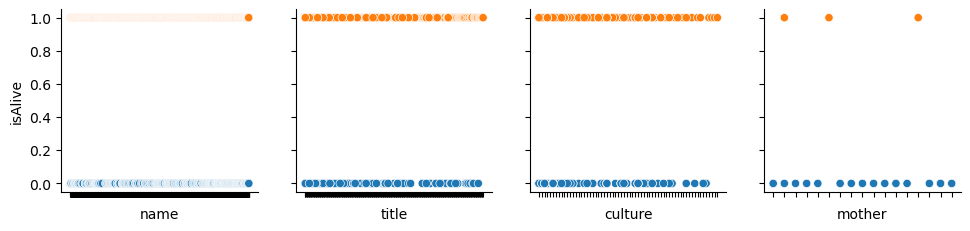

In [6]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[0:4], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot).set(xticklabels=[])
plt.show()

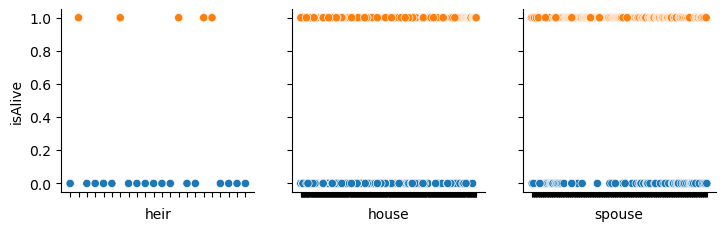

In [7]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[5:8], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot).set(xticklabels=[])
plt.show()

In [8]:
x_vars = characters.columns.to_list()
remove_lst = ['name', 'title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
x_vars = [x for x in x_vars if x not in remove_lst]
y_vars = ["isAlive"]

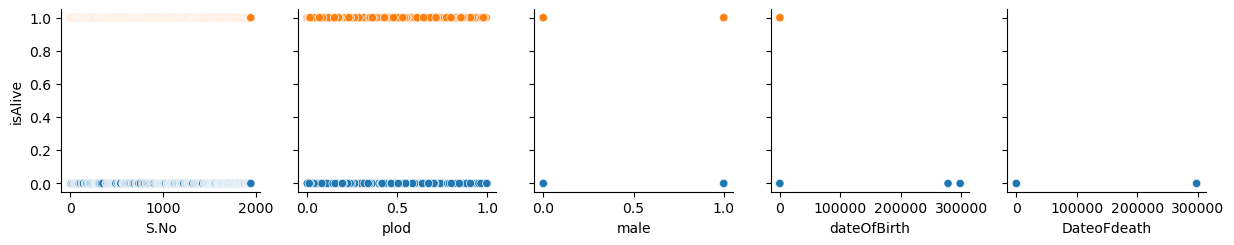

In [9]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[0:5], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

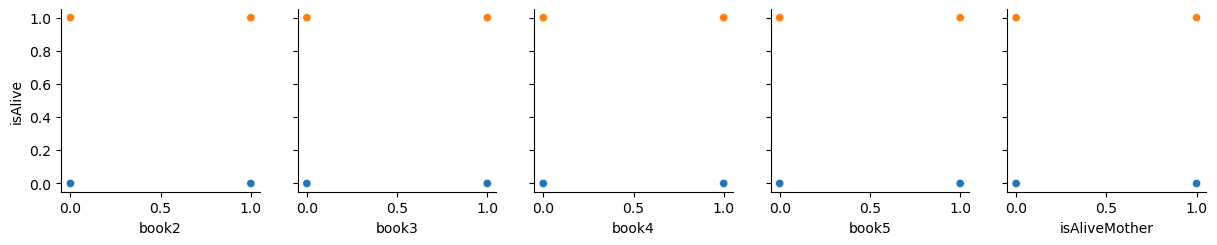

In [10]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[6:11], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

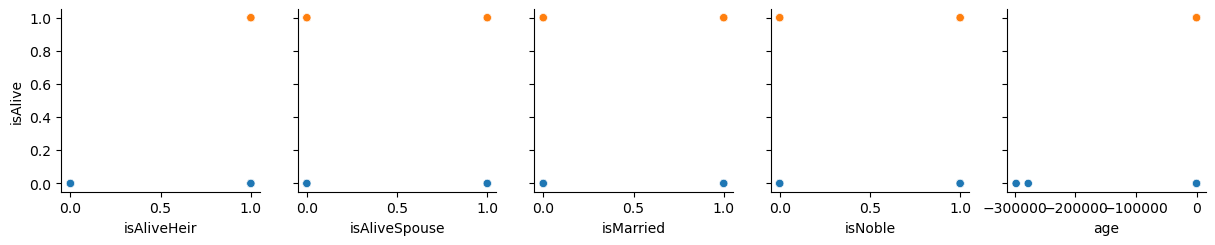

In [11]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[12:17], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

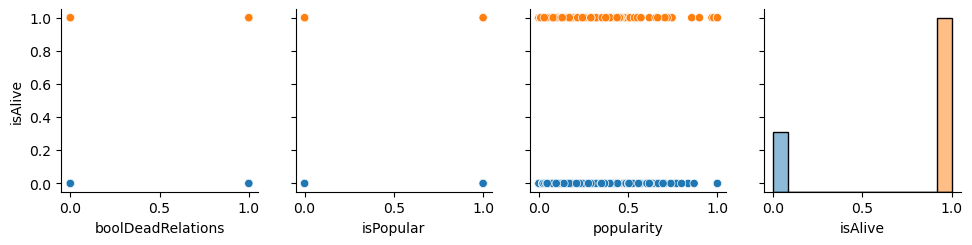

In [12]:
g = sns.PairGrid(characters, hue="isAlive", x_vars=x_vars[18:], y_vars=y_vars).map_diag(sns.histplot, color=".3").map_offdiag(sns.scatterplot)
plt.show()

**Distribution of Culture** | Divya

In [13]:
characters.culture.value_counts()

Northmen     124
Ironborn     112
Free Folk     51
Valyrian      43
Braavosi      42
            ... 
Andal          1
Norvoshi       1
Qarth          1
Lhazarene      1
The Reach      1
Name: culture, Length: 64, dtype: int64

In [14]:
len(characters.culture.unique())

65

In [15]:
characters.culture = characters.culture.replace(to_replace = "northmen", value = "Northmen")
characters.culture = characters.culture.replace(to_replace = "ironborn", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Ironmen", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Asshai'i", value = "Asshai")
characters.culture = characters.culture.replace(to_replace = "Free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "Summer Islands", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "Summer Islander", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "westermen", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerman", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerlands", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Vale", value = "Valemen")
characters.culture = characters.culture.replace(to_replace = "Lhazareen", value = "Lhazarene")
characters.culture = characters.culture.replace(to_replace = "The Reach", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Reachmen", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Qarth", value = "Qartheen")
characters.culture = characters.culture.replace(to_replace = "Lyseni", value = "Lysene")
characters.culture = characters.culture.replace(to_replace = "Stormlander", value = "Stormlands")
characters.culture = characters.culture.replace(to_replace = "Meereenese", value = "Meereen")
characters.culture = characters.culture.replace(to_replace = "Astapor", value = "Astapori")
characters.culture = characters.culture.replace(to_replace = "Norvos", value = "Norvoshi")
characters.culture = characters.culture.replace(to_replace = "Wildlings", value = "Wildling")
characters.culture = characters.culture.replace(to_replace = "Andals", value = "Andal")
characters.culture = characters.culture.replace(to_replace = "Braavos", value = "Braavosi")
characters.culture = characters.culture.replace(to_replace = "Dorne", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Dornishmen", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Ghiscaricari", value = "Ghiscari")

In [17]:
culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
survival_counts = pd.DataFrame(characters.groupby(['culture']).isAlive.value_counts())
survival_counts.rename({'isAlive':'count_survived'}, axis='columns', inplace=True)
survival_counts = pd.DataFrame(survival_counts.to_records())
#for Qohor and Astapori, no one survived — this will be taken into account later and for now they will be dropped
survival_counts = survival_counts[survival_counts['isAlive'] == 1] 
survival_counts.drop(columns=["isAlive"], inplace=True)
culture_counts = culture_counts.rename(columns={'index':'culture', "culture" : "total"})
survival_df = culture_counts.merge(survival_counts)
survival_df['percent_survived'] = (survival_df['count_survived']/survival_df['total'])*100
survival_df = survival_df.sort_values(by=['percent_survived'], ascending=False)
characters.culture = characters.culture.replace(to_replace = ['Ibbenese', 'Asshai', 'Lhazarene', 'Summer Isles', 'First Men', 'Naathi', 'Norvoshi', 'Rhoynar', 'Crannogmen'], value = "all_survive")
characters.culture = characters.culture.replace(to_replace = ['Ironborn', 'Ghiscari', 'Vale mountain clans', 'Dornish', 'Reach'], value = "most_survive")
characters.culture = characters.culture.replace(to_replace = ['Dothraki', 'Stormlands', 'Rivermen', 'Braavosi', 'Northmen'], value = "many_survive")
characters.culture = characters.culture.replace(to_replace = ['Qartheen', 'Myrish', 'Lysene', 'Valemen', 'Northern mountain clans', 'Tyroshi', 'Westeros'], value = "morethanhalf_survive")
characters.culture = characters.culture.replace(to_replace = ['Westermen', 'Riverlands', 'Pentoshi', 'Free Folk', 'Sistermen', 'Meereen'], value = "half_survive")
characters.culture = characters.culture.replace(to_replace = ['Riverlands', 'Lysene', 'Valyrian'], value = "few_survive")
characters.culture = characters.culture.replace(to_replace = ['Wildling', 'Valyrian'], value = "few_survive")
characters.culture = characters.culture.replace(to_replace = ['Astapori', 'Qohor'], value = "none_survive")
culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
culture_counts = culture_counts.rename(columns={'index':'culture_bin', "culture" : "count"})
culture_counts

,culture_bin,count
0,many_survive,226
1,most_survive,218
2,half_survive,91
3,morethanhalf_survive,61
4,few_survive,47
5,all_survive,25
6,none_survive,7
7,Andal,2


**Distribution of House** | Charles

In [18]:
# Charles
characters.house.value_counts()

Night's Watch      105
House Frey          97
House Stark         72
House Targaryen     62
House Lannister     49
                  ... 
House Gower          1
House Borrell        1
Citadel              1
Wise Masters         1
Three-eyed crow      1
Name: house, Length: 347, dtype: int64

In [19]:
len(characters.house.unique())

348

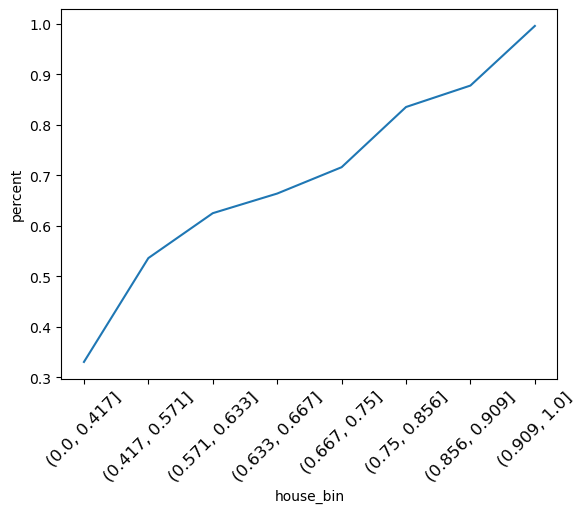

In [20]:
for house in characters.house:
    percent_alive = characters[characters.house == house].isAlive.mean()
    characters.loc[characters.house == house, 'house_alive'] = percent_alive

# Bin house_alive into 5 bins
binned_house_alive = pd.qcut(characters['house_alive'],10,retbins=True, duplicates = 'drop')
bins = binned_house_alive[1]
characters['house_alive_binned'] = pd.cut(characters['house_alive'],bins = bins)
dum = pd.get_dummies(characters.house_alive_binned,drop_first = True)
dum.columns = ['house_alive'+str(x) for x in range(1,len(bins)-1)]
characters = pd.concat([characters,dum], axis = 1)

# Linechart for House Bins
house_survival = characters.groupby('house_alive_binned')['isAlive'].agg([('percent','mean'),('nobs','count')]).reset_index(drop=False)
intervals = house_survival.house_alive_binned.to_list()
intervals_string = []
for i in range(len(intervals)):
    string = str(intervals[i])
    intervals_string.append(string)
    
house_chart = sns.lineplot(x = intervals_string, y= house_survival['percent'])
plt.xlabel('house_bin')
house_chart.set_xticks(intervals_string)
house_chart.set_xticklabels(intervals_string, rotation=45, size=12)
plt.show()

**Distribution of Age binned** | Annie

In [21]:
characters.age.value_counts()

100.0    29
19.0     19
22.0     16
21.0     15
20.0     14
         ..
61.0      1
85.0      1
2.0       1
59.0      1
1.0       1
Name: age, Length: 85, dtype: int64

In [22]:
len(characters.age.unique())

86

In [23]:
age = characters.copy()
age.dropna(subset=['age'], inplace = True)

# fixing incorrect (negative) ages with correct ages from online research
age.at[1684,'age'] = 0
age.at[1868,'age'] = 25

# adding column for the decade of characters' lives
age['decade'] = age['age'].apply(lambda x: 
                                 'first' if x < 10
                                 else 'second' if x >= 10 and x < 20
                                 else 'third' if x >= 20 and x < 30
                                 else 'fourth' if x >= 30 and x < 40
                                 else 'fifth' if x >= 40 and x < 50
                                 else 'sixth' if x >= 50 and x < 60
                                 else 'seventh' if x >= 60 and x < 70
                                 else 'eighth' if x >= 70 and x < 80
                                 else 'ninth' if x >= 80 and x < 90
                                 else 'tenth' if x >= 90 and x < 100
                                                   else '100')

# characters grouped by age 
age_count = pd.DataFrame(characters.groupby('age').count().isAlive)
age_count.rename(columns={'isAlive': 'count_total'}, inplace = True)
age_alive = pd.DataFrame(characters.groupby('age').sum().isAlive)
age_alive.rename(columns={'isAlive': 'count_alive'}, inplace = True)
age_distribution = pd.concat([age_alive, age_count], axis = 1)
age_distribution['perc_alive'] = np.divide(age_distribution.count_alive, age_distribution.count_total)

# characters grouped by age decade
decade_count = pd.DataFrame(age.groupby('decade').count().isAlive)
decade_count.rename(columns={'isAlive': 'count_total'}, inplace = True)
decade_alive = pd.DataFrame(age.groupby('decade').sum().isAlive)
decade_alive.rename(columns={'isAlive': 'count_alive'}, inplace = True)
decade_distribution = pd.concat([decade_alive, decade_count], axis = 1)
decade_distribution['perc_alive'] = np.divide(decade_distribution.count_alive, decade_distribution.count_total)

In [24]:
age_distribution.head(3)

,count_alive,count_total,perc_alive
age,,,
-298001.0,0,1,0.0
-277980.0,0,1,0.0
0.0,0,2,0.0


In [25]:
decade_distribution.head(3)

,count_alive,count_total,perc_alive
decade,,,
100,0,29,0.000000
eighth,6,11,0.545455
fifth,29,45,0.644444


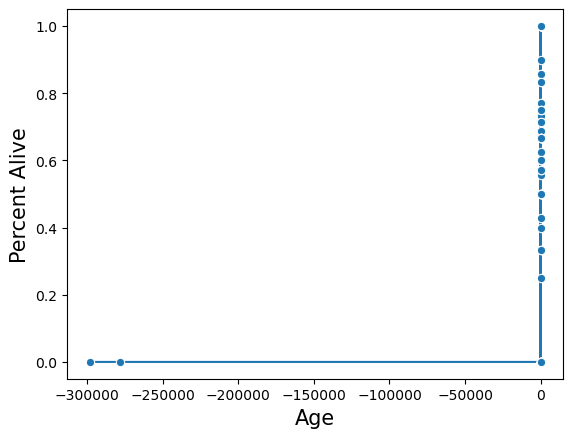

In [26]:
age_chart = sns.lineplot(data=age_distribution, x=age_distribution.index, y=age_distribution.perc_alive, marker='o')
age_chart.set_xlabel('Age', fontdict={'size': 15})
age_chart.set_ylabel('Percent Alive', fontdict={'size': 15})
plt.show()

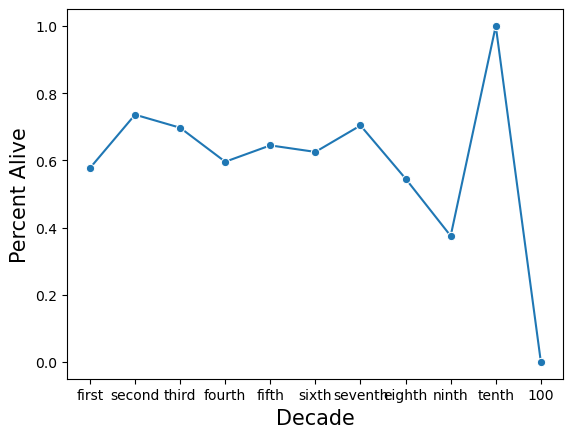

In [27]:
decade_distribution.index = pd.Categorical(decade_distribution.index,
                                   categories=['first', 'second', 'third', 'fourth', 'fifth', 'sixth',
                                              'seventh', 'eighth', 'ninth', 'tenth', '100'],
                                   ordered=True)

decade_chart = sns.lineplot(data=decade_distribution, x=decade_distribution.index, y=decade_distribution.perc_alive, marker='o')
decade_chart.set_xlabel('Decade', fontdict={'size': 15})
decade_chart.set_ylabel('Percent Alive', fontdict={'size': 15})
plt.show()

## Data cleaning and preparation



**Data Cleaning** | Divya

From the data quality check we realized that:

1. `Culture` and `house` were central predictors we were planning to use, but had more than 65% and and 20% missing values respectively. It is very difficult to impute their values because it is a categorical variable for fictional characaters. The values would likely be missing for less important characters, so we removed such columns from the data. We also subset our original dataframe with the columns we used as predictors.

2. The column `culture` has values that should be categorized under the same value but were noted with different spellings. This would distort our count of how many people are in each culture so we correctly grouped the same values together. 

3. The columns `culture` and `house` needed to be binned according to what percentage of the culture or house survived because then the binned categories would have the strongest relationship with isAlive

In [34]:
characters = characters.loc[:,['name', 'male', 'house', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive', 'culture', 'boolDeadRelations', 'isPopular']]
characters.dropna(inplace = True)
characters.reset_index(drop = True, inplace = True)

In [29]:
characters.culture = characters.culture.replace(to_replace = "northmen", value = "Northmen")
characters.culture = characters.culture.replace(to_replace = "ironborn", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Ironmen", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Asshai'i", value = "Asshai")
characters.culture = characters.culture.replace(to_replace = "Free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "Summer Islands", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "Summer Islander", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "westermen", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerman", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerlands", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Vale", value = "Valemen")
characters.culture = characters.culture.replace(to_replace = "Lhazareen", value = "Lhazarene")
characters.culture = characters.culture.replace(to_replace = "The Reach", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Reachmen", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Qarth", value = "Qartheen")
characters.culture = characters.culture.replace(to_replace = "Lyseni", value = "Lysene")
characters.culture = characters.culture.replace(to_replace = "Stormlander", value = "Stormlands")
characters.culture = characters.culture.replace(to_replace = "Meereenese", value = "Meereen")
characters.culture = characters.culture.replace(to_replace = "Astapor", value = "Astapori")
characters.culture = characters.culture.replace(to_replace = "Norvos", value = "Norvoshi")
characters.culture = characters.culture.replace(to_replace = "Wildlings", value = "Wildling")
characters.culture = characters.culture.replace(to_replace = "Andals", value = "Andal")
characters.culture = characters.culture.replace(to_replace = "Braavos", value = "Braavosi")
characters.culture = characters.culture.replace(to_replace = "Dorne", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Dornishmen", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Ghiscaricari", value = "Ghiscari")

**Data Preparation** -- not answered

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [30]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [31]:
######-----------Shuffling the dataset for K-fold------------#########

In [32]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

## Exploratory data analysis -- shift some code from somewhere above to here??

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [ ]:
characters.shape

In [35]:
# create dataframe for continuous predictors with
# (1) correlation to isAlive (2) count of nan values 

corr = pd.DataFrame(characters.corrwith(characters['isAlive'])).sort_values(by=[0], ascending = False)
corr.rename(columns = {0:'corr'})
corr = corr.abs()

nans = pd.DataFrame(characters.isnull().sum())
nans.rename(columns = {0:'NA_count'})

eda = corr.merge(nans, how = 'left', left_index = True, right_index = True)
eda.rename(columns = {'0_x':'corr', '0_y':'NA_count'}, inplace = True)
eda.sort_values(by=['corr'], ascending = False)

# note: plod is a predicted value used by the creators of the dataset, so we are not including it

,corr,NA_count
isAlive,1.000000,0
boolDeadRelations,0.170938,0
numDeadRelations,0.145381,0
male,0.093552,0
isNoble,0.089122,0
popularity,0.054227,0
isPopular,0.039975,0


## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.